In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Load and inspect data

In [2]:
wbtc_df = pd.read_csv(Path('../../resources/prices/coin_WrappedBitcoin.csv'), index_col='SNo')
wbtc_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Wrapped Bitcoin,WBTC,2019-01-31 23:59:59,3535.421222,3435.290530,3496.839832,3466.506533,1.928907e+04,0.000000e+00
2,Wrapped Bitcoin,WBTC,2019-02-01 23:59:59,3517.770253,3422.825563,3469.392973,3480.772314,1.364047e+04,0.000000e+00
3,Wrapped Bitcoin,WBTC,2019-02-02 23:59:59,3546.404225,3459.112772,3476.335119,3542.095361,1.894967e+03,0.000000e+00
4,Wrapped Bitcoin,WBTC,2019-02-03 23:59:59,3544.667094,3436.177705,3540.562788,3477.866026,6.524925e+03,0.000000e+00
5,Wrapped Bitcoin,WBTC,2019-02-04 23:59:59,3500.410630,3445.643244,3481.734248,3481.219346,3.540939e+03,0.000000e+00
...,...,...,...,...,...,...,...,...,...
755,Wrapped Bitcoin,WBTC,2021-02-23 23:59:59,54201.520027,45310.731871,54197.863611,48617.612093,4.210858e+08,6.000398e+09
756,Wrapped Bitcoin,WBTC,2021-02-24 23:59:59,51239.996875,47226.892550,48628.873885,49437.058830,1.853116e+08,6.101535e+09
757,Wrapped Bitcoin,WBTC,2021-02-25 23:59:59,51664.517017,47041.730956,49431.156373,47041.730956,1.400406e+08,5.805903e+09


In [3]:
wbtc_df['Date'] = pd.to_datetime(wbtc_df['Date']).dt.date
wbtc_df['Date'] = pd.to_datetime(wbtc_df['Date'])
wbtc_df['Spread'] = wbtc_df.High - wbtc_df.Low
wbtc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 1 to 759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       759 non-null    object        
 1   Symbol     759 non-null    object        
 2   Date       759 non-null    datetime64[ns]
 3   High       759 non-null    float64       
 4   Low        759 non-null    float64       
 5   Open       759 non-null    float64       
 6   Close      759 non-null    float64       
 7   Volume     759 non-null    float64       
 8   Marketcap  759 non-null    float64       
 9   Spread     759 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 65.2+ KB


## Plot the closing value of WBTC over time

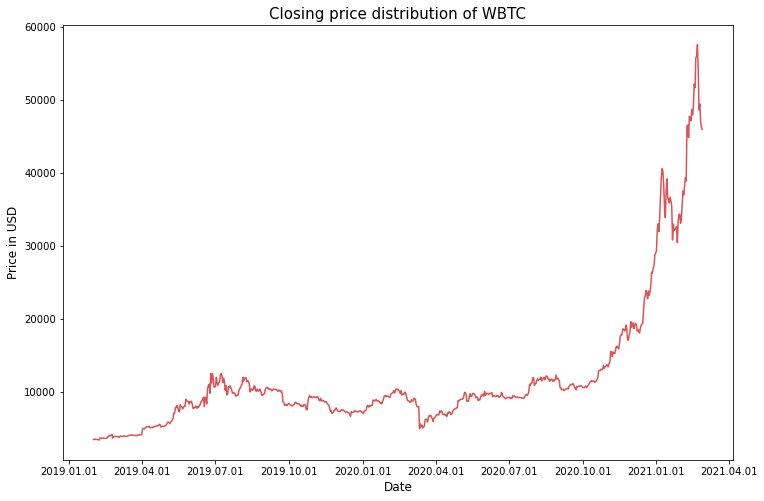

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = wbtc_df.Close.values, x=wbtc_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = wbtc_df.Close.values, x=wbtc_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of WBTC", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

wbtc_df['Date_mpl'] = wbtc_df['Date'].apply(lambda x: mdates.date2num(x))

temp_wbtc_df = wbtc_df.copy(deep=False)
temp_wbtc_df = temp_wbtc_df.set_index(['Date'])
temp_wbtc_df = temp_wbtc_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_wbtc_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2019-01-31,3535.421222,3435.290530,3496.839832,3466.506533,1.928907e+04,17927.0
2019-02-01,3517.770253,3422.825563,3469.392973,3480.772314,1.364047e+04,17928.0
2019-02-02,3546.404225,3459.112772,3476.335119,3542.095361,1.894967e+03,17929.0
2019-02-03,3544.667094,3436.177705,3540.562788,3477.866026,6.524925e+03,17930.0
2019-02-04,3500.410630,3445.643244,3481.734248,3481.219346,3.540939e+03,17931.0
...,...,...,...,...,...,...
2021-02-23,54201.520027,45310.731871,54197.863611,48617.612093,4.210858e+08,18681.0
2021-02-24,51239.996875,47226.892550,48628.873885,49437.058830,1.853116e+08,18682.0
2021-02-25,51664.517017,47041.730956,49431.156373,47041.730956,1.400406e+08,18683.0


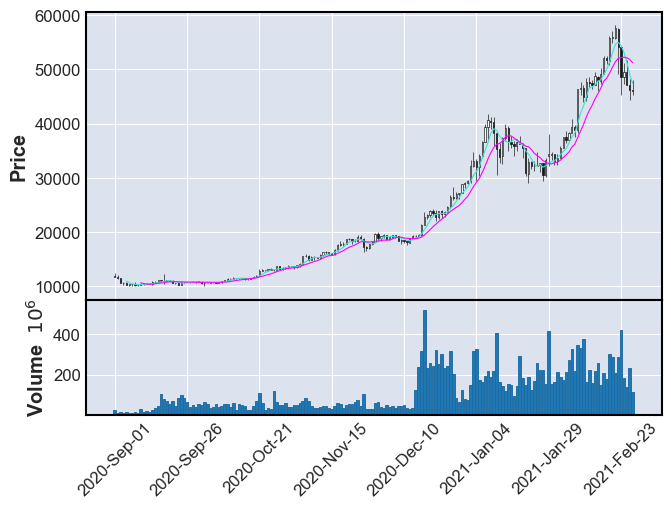

In [6]:
mpf.plot(temp_wbtc_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_WrappedBitcoin.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE,
                               parse_dates=['Date'],
                               usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet(changepoint_prior_scale=.7)
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,56062.081279,53667.482298,58383.642347
183,2021-03-03 23:59:59,56934.519019,54302.548614,59515.668201
184,2021-03-04 23:59:59,57534.082731,55032.722606,59971.499924
185,2021-03-05 23:59:59,58227.256306,55694.537402,61075.121920
186,2021-03-06 23:59:59,58814.356479,56284.810647,61558.975301


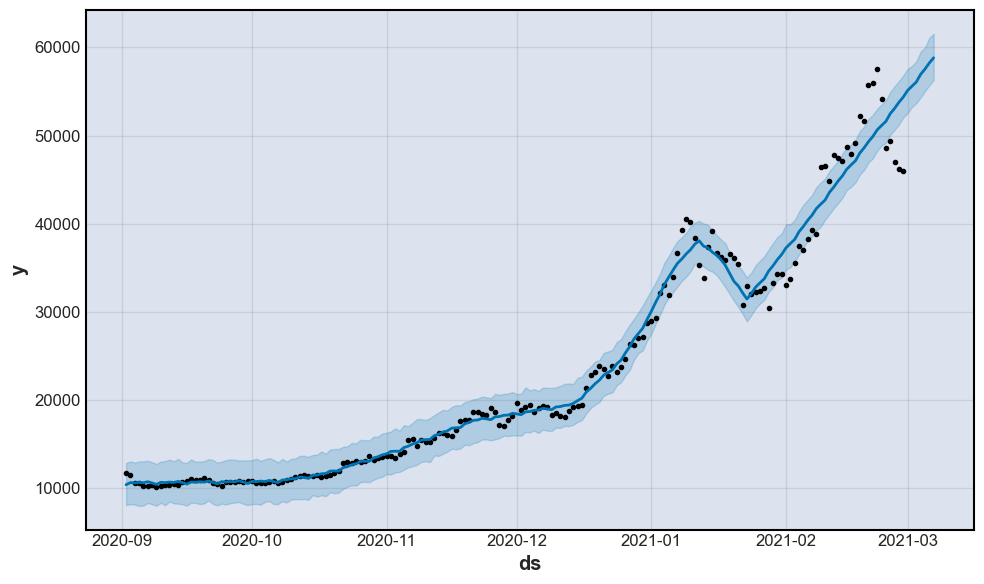

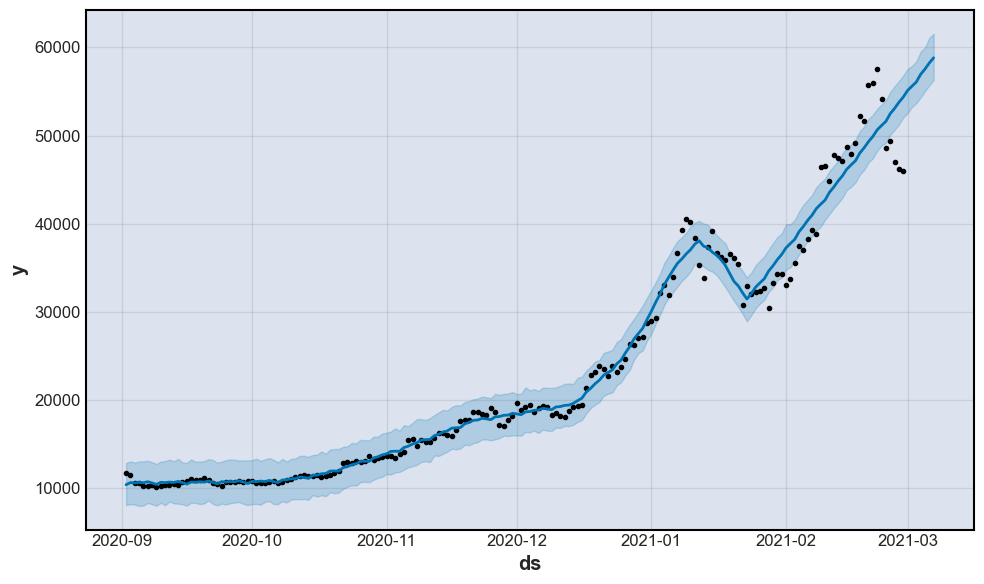

In [9]:
m.plot(forecast)

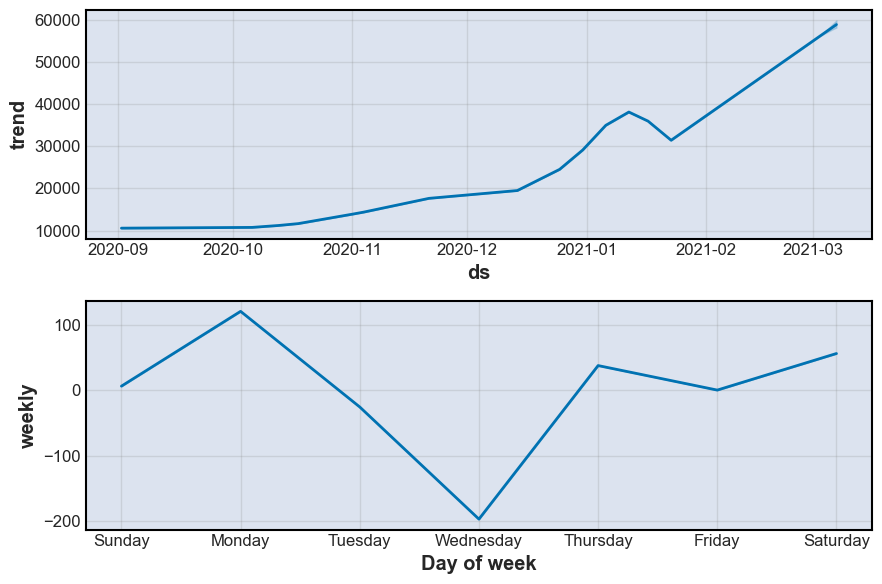

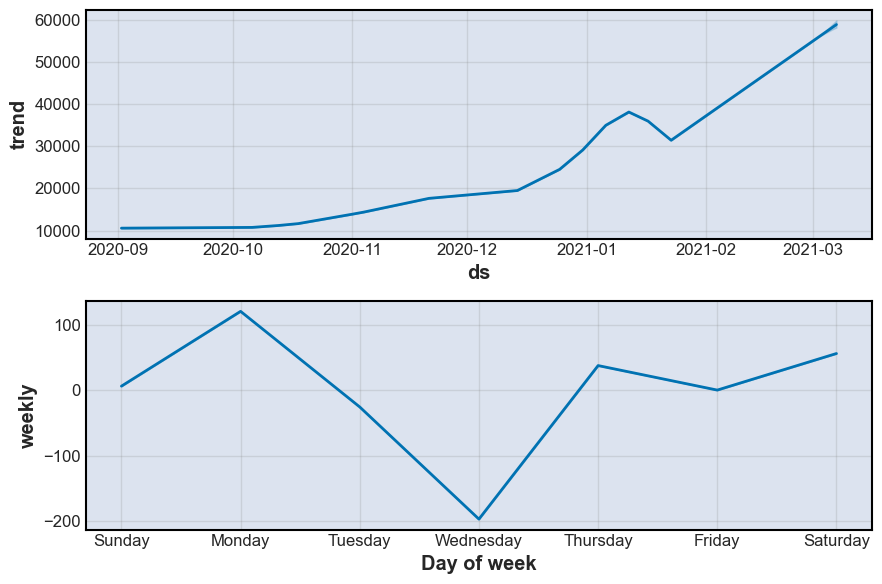

In [10]:
m.plot_components(forecast)